### EXER 2:

In [13]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 8. For the IRIS data set write down the meta information.

The Iris flower data set is a multivariate dataset collected the data to quantify the morphologic variation of Iris flowers of three related species. 

The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Number of Attributes: 4

Number of Instances: 150

SepalLengthCm: Length of the sepal of flower (in cm)

SepalWidthCm: Width of the sepal of flower(in cm)

PetalLengthCm: Length of the petal of flower (in cm)

PetalWidthCm: Width of the Petal of flower(in cm)

Species: Target variable (Iris-setosa or Iris-versicolor or Iris-virginica)

Number of null values: 0

In [14]:
# Importing the iris dataset
df = pd.read_csv('iris.csv')
df.drop(columns = 'Id',inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Assigning the predictor variables to 'x' and response variable to 'y'
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### 9. Visualize the class label against the predictor variable using appropriate plots.


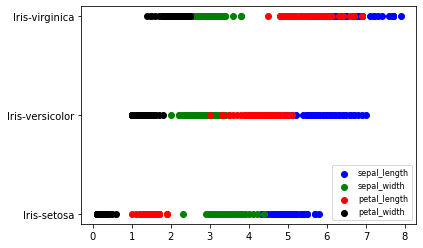

In [16]:
pltX = df.loc[:, 'SepalLengthCm']
pltY = df.loc[:,'Species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = df.loc[:, 'SepalWidthCm']
pltY = df.loc[:,'Species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = df.loc[:, 'PetalLengthCm']
pltY = df.loc[:,'Species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = df.loc[:, 'PetalWidthCm']
pltY = df.loc[:,'Species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [17]:
pd.DataFrame(df["Species"].value_counts())

,Species
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,50


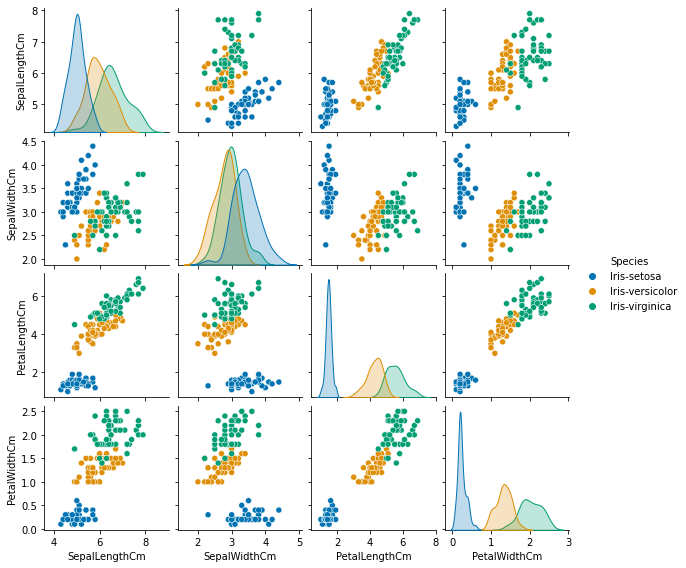

In [18]:
# Using a pairplot to observe the distributions b/w attributes
sns.pairplot(df, hue="Species", height = 2, palette = 'colorblind');

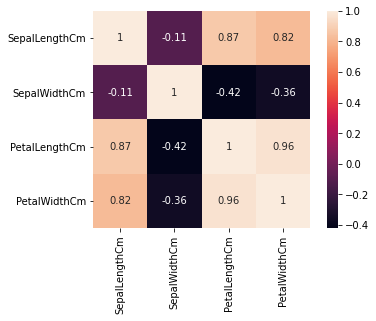

In [19]:
# Visualizing the correlation using heatmap to find relation b/w attributes.
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True);

### 10. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [20]:
# Splitting the train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=0)

In [21]:
# Using the linear_model module of sklearn to build a Logistic Regression model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [22]:
# using different metrics to find accuracy and performance of the classifier.
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics

model.score(x_test,y_test)

0.9777777777777777

In [23]:
accuracy_score(y_pred,y_test)

0.9777777777777777

### 11. Analysis and visualize the performance of the classifier using metrics, confusion matrix .

In [24]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_pred)
pd.DataFrame(c,index = ['True-Sentosa','True-Versicolor','True-Virgiica'],columns = ['Pred-Sentosa','Pred-Versicolor','Pred-Virgiica'])

,Pred-Sentosa,Pred-Versicolor,Pred-Virgiica
True-Sentosa,16,0,0
True-Versicolor,0,17,1
True-Virgiica,0,0,11


<AxesSubplot:>

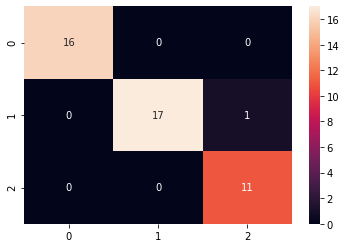

In [25]:
sns.heatmap(c,annot=True)

### 12. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (80,20) using train_test_split method in sklearn.


In [26]:
# Using the LabelEncoder function to convert target variable to float datatype.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

In [27]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [29]:
# Building a KNN Classifier using sklearn library.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions)*100)
confusion_matrix(Y_test, predictions)

100.0


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 13. Identify the best k ( for k between 2 and 20) for the model built.

Text(0, 0.5, 'Accuracy')

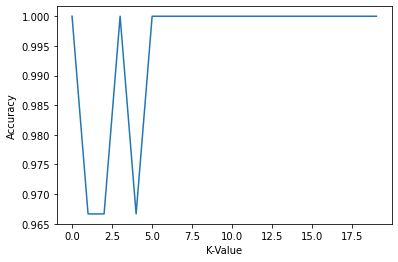

In [30]:
# creating list of K for KNN
k_list = list(range(1,21))
# creating list of scores
scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred =knn.predict(x_test)
    scores.append(knn.score(X_test,Y_test))
    
plt.plot(scores)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Misclassification rate')

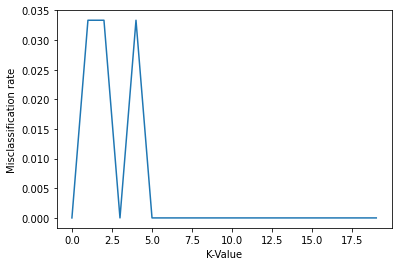

In [31]:
error_rate = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))

plt.plot(error_rate)
plt.xlabel("K-Value")
plt.ylabel("Misclassification rate")

Based on the above curves, we can achieve max accuracy when the value of 'K' in the KNN classifier would be between 5 and 20

### 14. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset

Based on the performance of the above Logistic Regression and KNearestNeighbours classifiers, we may conclude that KNN classifier has better performance for the IRIS dataset.